In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import folium

# Create a DataFrame
df = pd.read_csv('dataset/optional/merchants_train.csv', delimiter=';')



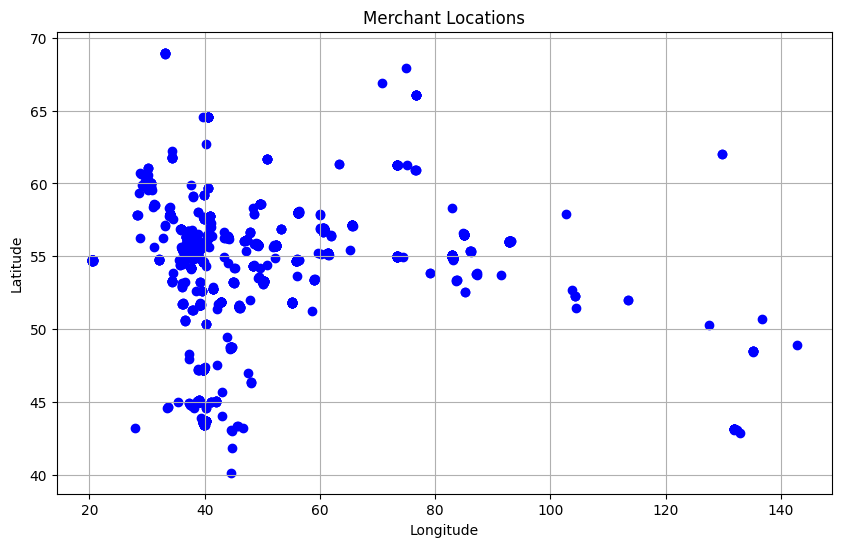

In [9]:
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], color='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Merchant Locations')
plt.grid(True)
plt.show()

# Map visualization using folium
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Merchant ID: {row['merchant_id']}").add_to(m)

m.save('merchant_locations_map.html')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Create a DataFrame
data = pd.read_csv('dataset/optional/transactions.csv')


In [6]:
# Convert time-related columns to datetime
data['real_transaction_dttm'] = pd.to_datetime(data['real_transaction_dttm'])
data['record_date'] = pd.to_datetime(data['record_date'])
# Filter out rows with invalid latitude and longitude
data = data[(data['latitude'] != 0) & (data['longitude'] != 0)]

# Calculate time difference between real_transaction_dttm and record_date
data['time_difference'] = (data['real_transaction_dttm'] - data['record_date']).dt.total_seconds()

# Group by merchant_id, latitude, and longitude
merchant_groups = data.groupby(['merchant_id', 'latitude', 'longitude'])

# Calculate transaction frequency and total time difference for each merchant
merchant_stats = merchant_groups.agg({
    'merchant_id': 'count',
    'time_difference': 'sum'
}).rename(columns={'merchant_id': 'transaction_count', 'time_difference': 'total_time_difference'})

# Sort merchants by transaction frequency
top_merchants = merchant_stats.sort_values(by='transaction_count', ascending=False).head(10)

# Display the top merchants
print("Top Merchants by Transaction Frequency:")
print(top_merchants)


Top Merchants by Transaction Frequency:
                                  transaction_count  total_time_difference
merchant_id latitude  longitude                                           
465225      55.750347  37.623851                955               -61640.0
139937      55.750347  37.623851                667              -327922.0
67147       55.750347  37.623851                633                27416.0
738277      55.750347  37.623851                618               -26189.0
128895      55.750347  37.623851                589                38387.0
516608      55.750347  37.623851                391                 6427.0
74291       55.750347  37.623851                389               -87334.0
1690        55.750347  37.623851                353              -249868.0
128895      51.178900 -1.826400                 203                 2061.0
628472      55.750347  37.623851                188               -17801.0


In [8]:
# Convert time-related columns to datetime format
data['real_transaction_dttm'] = pd.to_datetime(data['real_transaction_dttm'], format='%H:%M:%S')
data['record_date'] = pd.to_datetime(data['record_date'], format='%H:%M:%S')

# Calculate the time duration between real_transaction_dttm and record_date
data['time_duration'] = data['real_transaction_dttm'] - data['record_date']

# Extract the hour of the day from real_transaction_dttm
data['transaction_hour'] = data['real_transaction_dttm'].dt.hour

# Calculate the frequency of transactions by hour
transactions_by_hour = data['transaction_hour'].value_counts().sort_index()

# Find the hour with the most frequent transactions
most_frequent_hour = transactions_by_hour.idxmax()

# Calculate the average time duration
average_duration = data['time_duration'].mean()

print("Hour with Most Frequent Transactions:", most_frequent_hour)
print("Average Time Duration:", average_duration)

Hour with Most Frequent Transactions: 19
Average Time Duration: 0 days 00:00:06.825797163


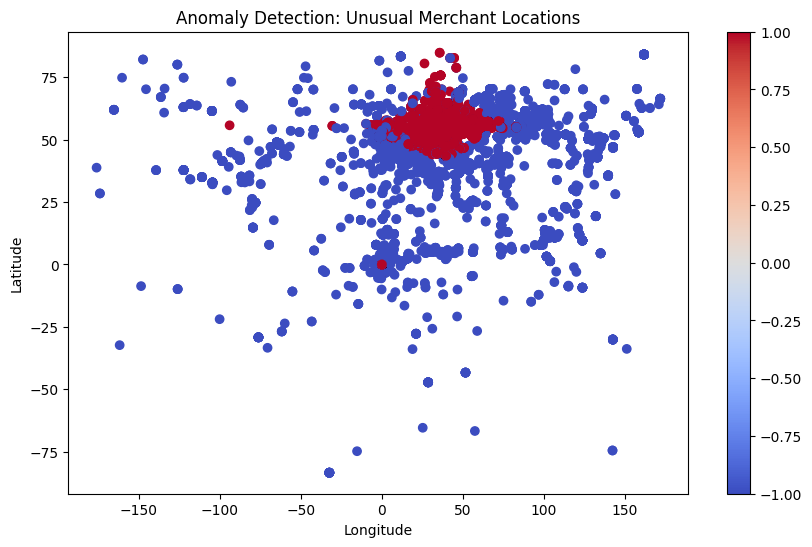

Anomalous Transactions:
         merchant_id   latitude  longitude real_transaction_dttm  \
1               178  55.055996  82.912991   1900-01-01 17:49:50   
3               178  55.056034  82.912734   1900-01-01 17:49:50   
4               178  55.056034  82.912734   1900-01-01 17:49:50   
5               178   0.000000   0.000000   1900-01-01 10:25:10   
7               178  55.055996  82.912991   1900-01-01 17:49:50   
...             ...        ...        ...                   ...   
249263      1657861  42.346278  41.803086   1900-01-01 20:44:34   
249300      1825014  32.110594  77.162605   1900-01-01 16:27:53   
249301      1825014   0.000000   0.000000   1900-01-01 08:29:20   
249308      1825014  32.110594  77.162605   1900-01-01 16:27:53   
249314      1827295   0.108325   0.015998   1900-01-01 20:35:42   

               record_date  time_duration  is_anomaly  
1      1900-01-01 17:54:24         -274.0          -1  
3      1900-01-01 17:43:01          409.0          -1  
4 

In [13]:
from sklearn.ensemble import IsolationForest

# Convert time-related columns to datetime format
data['real_transaction_dttm'] = pd.to_datetime(data['real_transaction_dttm'], format='%H:%M:%S')
data['record_date'] = pd.to_datetime(data['record_date'], format='%H:%M:%S')

# Calculate the time duration between real_transaction_dttm and record_date (in seconds)
data['time_duration'] = (data['real_transaction_dttm'] - data['record_date']).dt.total_seconds()

# Select numerical columns for anomaly detection
features = ['latitude', 'longitude', 'time_duration']

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.10, random_state=42)  # Adjust contamination level as needed
model.fit(data[features])

# Predict anomalies
data['is_anomaly'] = model.predict(data[features])

# Plot anomalies on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['is_anomaly'], cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection: Unusual Merchant Locations')
plt.colorbar()
plt.show()

# Display anomalies
anomalies = data[data['is_anomaly'] == -1]
print("Anomalous Transactions:\n", anomalies)